In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

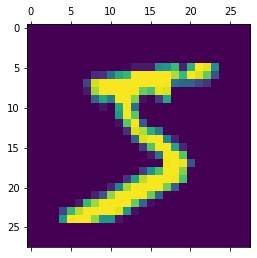

In [11]:
plt.matshow(X_train[0])

In [12]:
y_train[0]

5

### Scalling to improve accuracy

In [27]:
X_train = X_train / 255
X_test = X_test / 255

### flattening 

In [28]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [29]:
X_train_flattened.shape

(60000, 784)

In [30]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 879us/step - loss: 0.4912 - accuracy: 0.8757
Epoch 2/5
1875/1875 [==============================] - 2s 889us/step - loss: 0.3070 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 2s 869us/step - loss: 0.2854 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 855us/step - loss: 0.2754 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 2s 859us/step - loss: 0.2681 - accuracy: 0.9263


In [32]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 696us/step - loss: 0.2662 - accuracy: 0.9260


[0.26620906591415405, 0.9259999990463257]

In [33]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.41806468e-05, 1.14768785e-10, 3.99301862e-05, 1.10659003e-02,
       8.63372577e-07, 8.09620688e-05, 7.61363195e-10, 7.35649228e-01,
       8.10538477e-05, 1.06340647e-03], dtype=float32)

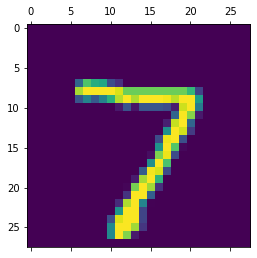

In [34]:
plt.matshow(X_test[0])

#### np.argmax finds a maximum element from an array and returns the index of it

In [35]:
np.argmax(y_predicted[0])

7

In [36]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [37]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [38]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    7,    2,    2,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   3,    9,  914,   21,    9,    4,   13,   11,   44,    4],
       [   1,    0,   13,  937,    0,   16,    2,   10,   22,    9],
       [   1,    1,    2,    1,  912,    0,   12,    4,    9,   40],
       [   8,    2,    3,   45,    9,  774,   15,    4,   26,    6],
       [  10,    3,    4,    1,    7,   12,  917,    2,    2,    0],
       [   1,    5,   21,    7,   10,    0,    0,  943,    3,   38],
       [   5,    7,    5,   26,    9,   30,    9,   10,  865,    8],
       [   9,    7,    2,   11,   24,    7,    0,   15,    6,  928]])>

Text(69.0, 0.5, 'Truth')

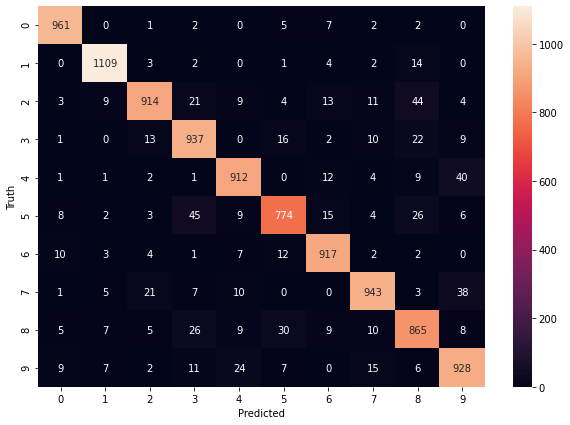

In [39]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using hidden layer

In [40]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2907 - accuracy: 0.9189
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1367 - accuracy: 0.9601
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0993 - accuracy: 0.9700
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0754 - accuracy: 0.9774
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0625 - accuracy: 0.9813


In [41]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0851 - accuracy: 0.9750


[0.08513548970222473, 0.9750000238418579]

Text(69.0, 0.5, 'Truth')

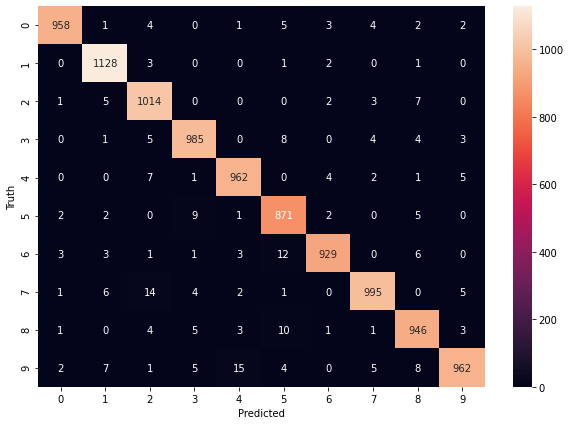

In [42]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using Flatten layer so that we don't have to call .reshape on input dataset

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2911 - accuracy: 0.9198
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1387 - accuracy: 0.9595
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1004 - accuracy: 0.9693
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0779 - accuracy: 0.9776
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0630 - accuracy: 0.9812
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0514 - accuracy: 0.9846
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0435 - accuracy: 0.9867
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0370 - accuracy: 0.9888
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0305 - accuracy: 0.9909
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.026

In [44]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 943us/step - loss: 0.0843 - accuracy: 0.9760


[0.08431682735681534, 0.9760000109672546]